In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def defect_detect(image):
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    value = hsv_img[:,:,2]
    blur_img = cv2.blur(value, (15,15))
    dst_img = cv2.fastNlMeansDenoising(blur_img, None, 10, 7, 21)
    _, binary = cv2.threshold(dst_img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((5,5), np.uint8)
    erosion = cv2.erode(binary, kernel, iterations=1)
    dilation = cv2.dilate(binary, kernel, iterations=1)
    img = image.copy()
    detection = ""
    if (dilation==0).sum() >1:
        detection = "Defective Fabric"
        contours, _ = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for i in contours:
            if cv2.contourArea(i) < 261121.0:
                cv2.drawContours(img, i, -1, (0, 255, 0), 3)
    else:
        detection = "Good Fabric"
    return image, hsv_img, value, blur_img, dst_img, binary, dilation, img, detection

input_image = cv2.imread(r"C:\Users\ARAVIND\Documents\PROJECT\Data\Data\Task4\Fabric22.jpg")
image, hsv_img, value, blur_img, dst_img, binary, dilation, img, detection = defect_detect(input_image)
print(detection)




Defective Fabric


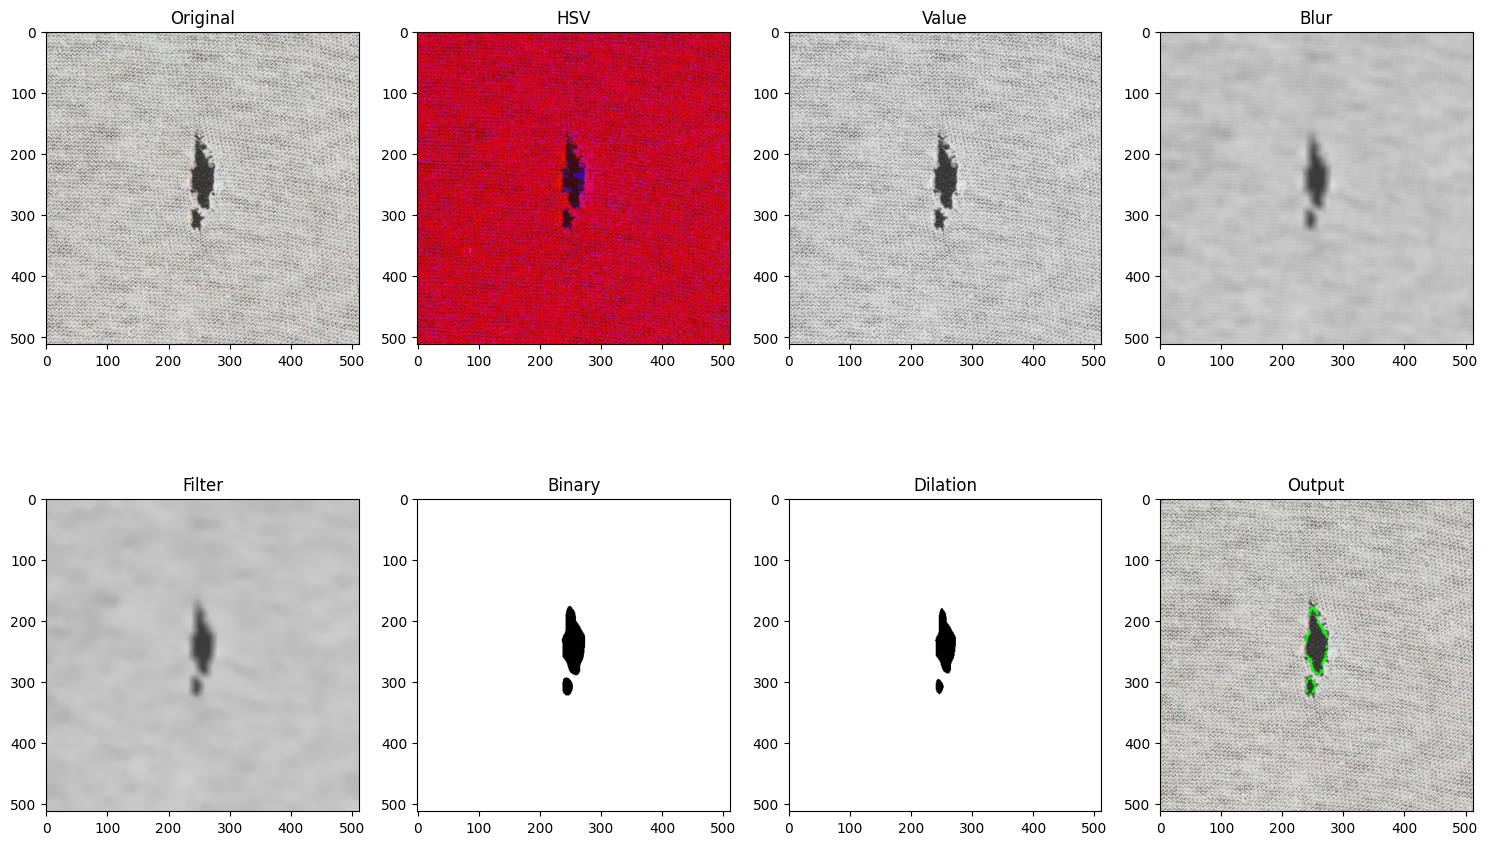

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0,0].set_title("Original")
ax[0,1].imshow(cv2.cvtColor(hsv_img, cv2.COLOR_BGR2RGB))
ax[0,1].set_title("HSV")
ax[0,2].imshow(cv2.cvtColor(value, cv2.COLOR_BGR2RGB))
ax[0,2].set_title("Value")
ax[0,3].imshow(cv2.cvtColor(blur_img,cv2.COLOR_BGR2RGB))
ax[0,3].set_title("Blur")
ax[1,0].imshow(cv2.cvtColor(dst_img, cv2.COLOR_BGR2RGB))
ax[1,0].set_title("Filter")
ax[1,1].imshow(binary, cmap='gray')
ax[1,1].set_title("Binary")
ax[1,2].imshow(dilation, cmap='gray')
ax[1,2].set_title("Dilation")
ax[1,3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1,3].set_title("Output")
fig.tight_layout()


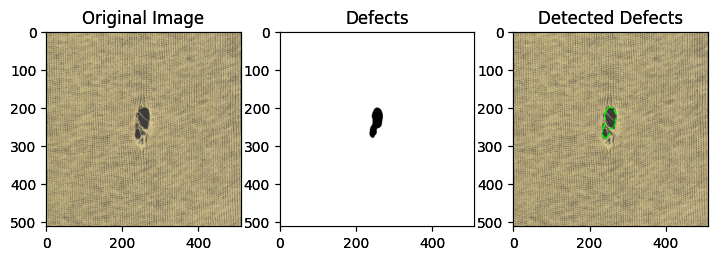

In [15]:
import wx
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_wxagg import FigureCanvas


class MainWindow(wx.Frame):
    
    app = wx.App()
    frame = MainWindow(None, title="Defect Detection")
    app.MainLoop()
    
    def __init__(self, parent, title):
        super(MainWindow, self).__init__(parent, title=title, size=(900, 550))

        self.InitUI()
        self.Centre()
        self.Show()

    def InitUI(self):
        panel = wx.Panel(self)

        vbox = wx.BoxSizer(wx.VERTICAL)

        hbox1 = wx.BoxSizer(wx.HORIZONTAL)
        self.image_path = wx.TextCtrl(panel)
        hbox1.Add(self.image_path, proportion=1, flag=wx.ALL|wx.EXPAND, border=5)
        browse_btn = wx.Button(panel, label='Browse')
        browse_btn.Bind(wx.EVT_BUTTON, self.onOpenFile)
        hbox1.Add(browse_btn, proportion=0, flag=wx.ALL|wx.EXPAND, border=5)
        vbox.Add(hbox1, flag=wx.EXPAND|wx.LEFT|wx.RIGHT|wx.TOP, border=10)

        hbox2 = wx.BoxSizer(wx.HORIZONTAL)
        self.result = wx.StaticText(panel, label="")
        hbox2.Add(self.result, proportion=1, flag=wx.ALL|wx.EXPAND, border=5)
        vbox.Add(hbox2, flag=wx.EXPAND|wx.LEFT|wx.RIGHT|wx.TOP, border=10)

        hbox3 = wx.BoxSizer(wx.HORIZONTAL)
        self.figure = plt.figure(figsize=(8, 5))
        self.canvas = FigureCanvas(panel, -1, self.figure)
        hbox3.Add(self.canvas, proportion=1, flag=wx.ALL|wx.EXPAND, border=5)
        vbox.Add(hbox3, proportion=1, flag=wx.EXPAND|wx.LEFT|wx.RIGHT|wx.TOP, border=10)

        panel.SetSizer(vbox)

    def onOpenFile(self, event):
        file_dialog = wx.FileDialog(self, "Open", wildcard="Image files (*.jpg, *.jpeg, *.png)|*.jpg;*.jpeg;*.png", style=wx.FD_OPEN | wx.FD_FILE_MUST_EXIST)
        if file_dialog.ShowModal() == wx.ID_CANCEL:
            return
        self.image_path.SetValue(file_dialog.GetPath())

        image = cv2.imread(file_dialog.GetPath())
        _, hsv_img, value, blur_img, dst_img, binary, dilation, img, detection = defect_detect(image)

        self.result.SetLabel(detection)

        ax = self.figure.add_subplot(1, 3, 1)
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title('Original Image')
        ax = self.figure.add_subplot(1, 3, 2)
        ax.imshow(dilation, cmap='gray')
        ax.set_title('Defects')

        ax = self.figure.add_subplot(1, 3, 3)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title('Detected Defects')

        self.canvas.draw()

   
